<a href="https://colab.research.google.com/github/shifanrasik/DetectChessPiecesCNN/blob/main/lab4cnnmlom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
train_path='/content/drive/MyDrive/MLOM/archive'


In [ ]:
#
model=tf.keras.models.Sequential([
    #input layer
    tf.keras.layers.Conv2D(filters=2,kernel_size=3, activation='sigmoid',input_shape=(124,124,3),strides=1, padding='valid'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(filters=2,kernel_size=3, activation='relu',strides=1, padding='valid'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(50,activation='relu'),

    tf.keras.layers.Dense(5,activation='softmax')

])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 122, 122, 2)       56        
                                                                 
 max_pooling2d (MaxPooling2  (None, 61, 61, 2)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 59, 59, 2)         38        
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 29, 29, 2)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1682)              0         
                                                                 
 dense (Dense)               (None, 50)                8

In [ ]:
dataset_dir = '/content/drive/MyDrive/MLOM/archive'

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(124, 124),
    batch_size=16,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(124, 124),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)


Found 523 images belonging to 5 classes.
Found 128 images belonging to 5 classes.


In [ ]:
#compile model
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:


history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 16,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 16
)

Epoch 1/50
32/32 [==============================] - 155s 5s/step - loss: 1.5971 - accuracy: 0.2485 - val_loss: 1.5759 - val_accuracy: 0.2656
Epoch 2/50
32/32 [==============================] - 5s 144ms/step - loss: 1.5766 - accuracy: 0.2801 - val_loss: 1.5622 - val_accuracy: 0.2656
Epoch 3/50
32/32 [==============================] - 4s 135ms/step - loss: 1.5348 - accuracy: 0.3314 - val_loss: 1.5412 - val_accuracy: 0.2812
Epoch 4/50
32/32 [==============================] - 7s 217ms/step - loss: 1.4923 - accuracy: 0.3767 - val_loss: 1.5160 - val_accuracy: 0.4219
Epoch 5/50
32/32 [==============================] - 4s 128ms/step - loss: 1.4301 - accuracy: 0.4418 - val_loss: 1.4906 - val_accuracy: 0.3828
Epoch 6/50
32/32 [==============================] - 6s 202ms/step - loss: 1.3746 - accuracy: 0.4852 - val_loss: 1.4359 - val_accuracy: 0.4297
Epoch 7/50
32/32 [==============================] - 4s 131ms/step - loss: 1.3043 - accuracy: 0.4970 - val_loss: 1.4111 - val_accuracy: 0.4297
Epoch 8

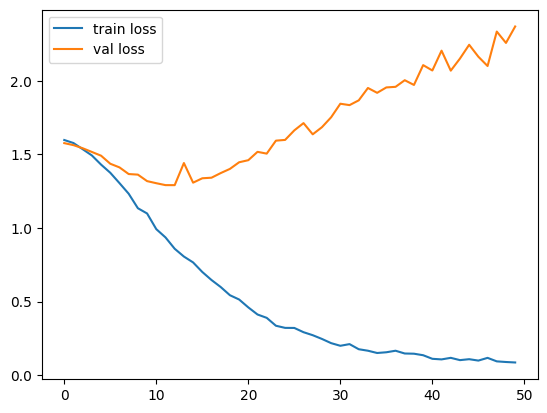

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
#plot the loss

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('Accval_acc')

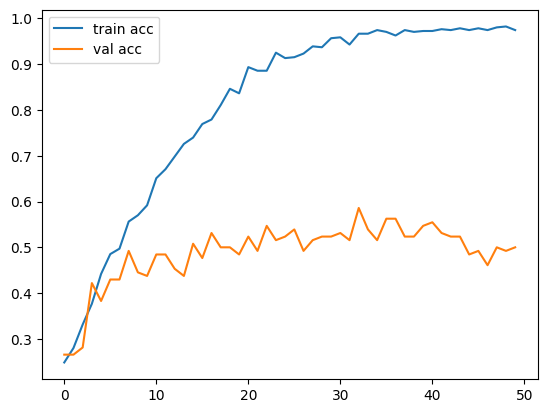

<Figure size 640x480 with 0 Axes>

In [ ]:
#plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('Accval_acc')